In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.factorplots

%matplotlib inline

/home/xian/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Matplotlib

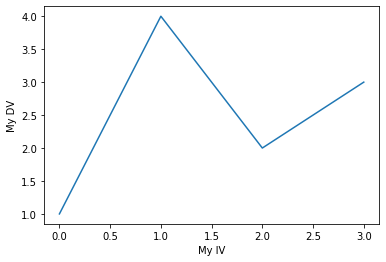

In [3]:
plt.plot([1, 4, 2, 3])
plt.xlabel('My IV')
plt.ylabel('My DV')
plt.show()

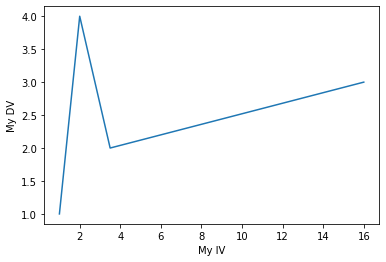

In [4]:
plt.plot([1, 2, 3.5, 16], [1, 4, 2, 3])
plt.xlabel('My IV')
plt.ylabel('My DV')
plt.show()

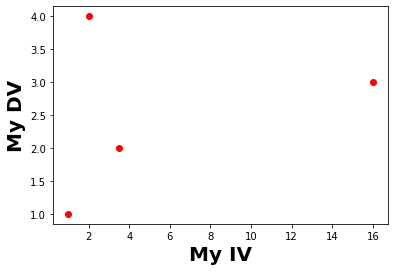

In [5]:
plt.plot([1, 2, 3.5, 16], [1, 4, 2, 3], 'ro')
plt.xlabel('My IV', fontsize=20, fontweight='bold')
plt.ylabel('My DV', fontsize=20, fontweight='bold')
plt.show()

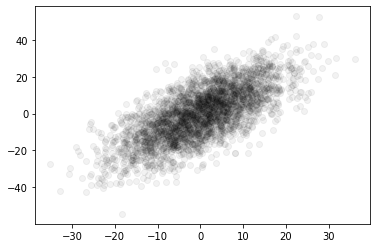

In [39]:
np.random.seed(5)

n_points = 3000

x = np.random.normal(0, 10, n_points)
y = x + np.random.normal(0, 10, n_points)

plt.plot(x, y, 'ko', alpha=0.05)

<BarContainer object of 3 artists>

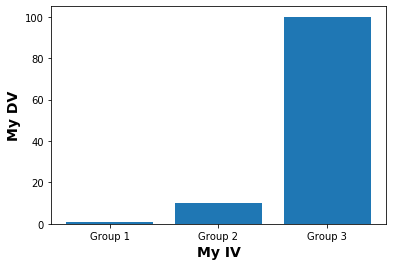

In [7]:
names = ['Group 1', 'Group 2', 'Group 3']
values = [1, 10, 100]
plt.xlabel('My IV', fontsize=14, fontweight='bold')
plt.ylabel('My DV', fontsize=14, fontweight='bold')
plt.bar(names, values)

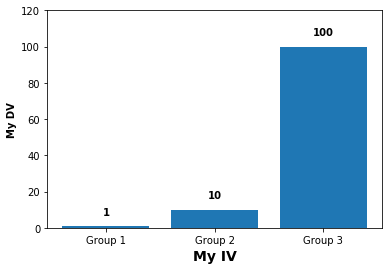

In [8]:
names = ['Group 1', 'Group 2', 'Group 3']
values = [1, 10, 100]
plt.xlabel('My IV', fontsize=14, fontweight='bold')
plt.ylabel('My DV', fontweight='bold')
plt.ylim([0,120])
plt.bar(names, values)

# Make some labels.
labels = [str(i) for i in values]

for x, y, label in zip(range(len(values)), values, labels):
    plt.text(x, y + 5, label, ha='center', va='bottom', fontweight='bold')

## Seaborn

In [9]:
#data = pd.read_csv('./shooter.csv', sep=',', na_values='.')
df = pd.read_csv('./shooter-data/shooter-group.csv', sep=',')
df.head()

,subject,age,stimulus,trial,race,gun,rt,correct,rate
0,18,27,b05,20,1,1,615,1,1.626016
1,18,27,b04,21,1,0,559,1,1.788909
2,18,27,w04,22,0,0,488,0,2.049180
3,18,27,b17,23,1,0,719,1,1.390821
4,18,27,w02,24,0,1,547,1,1.828154


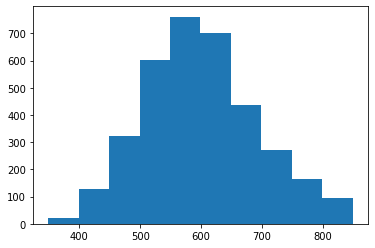

In [40]:
plt.hist(df['rt']);

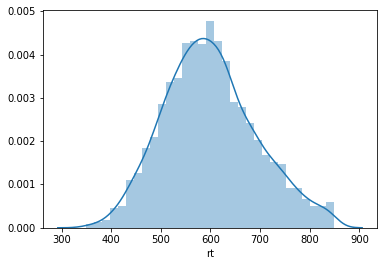

In [11]:
sns.distplot(df['rt'])

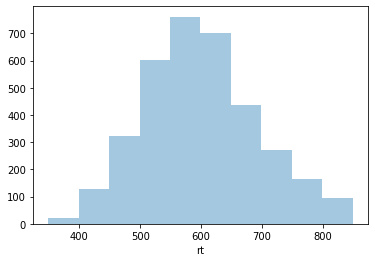

In [12]:
sns.distplot(df['rt'], kde=False, bins=10)

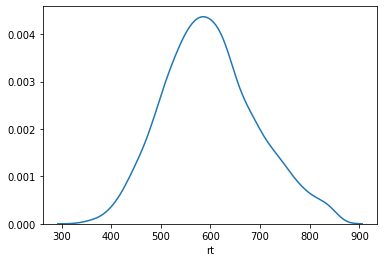

In [13]:
sns.distplot(df['rt'], hist=False)

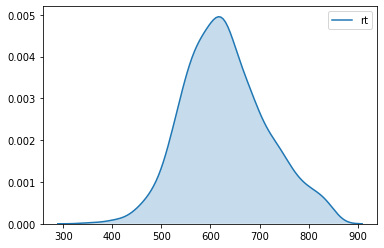

In [14]:
sns.kdeplot(df[df['gun']==0]['rt'], shade=True)

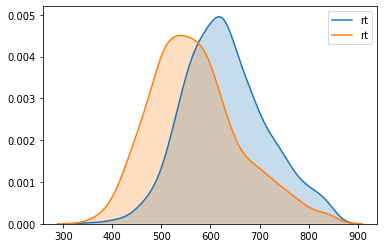

In [15]:
sns.kdeplot(df[df['gun']==0]['rt'], shade=True)
sns.kdeplot(df[df['gun']==1]['rt'], shade=True)

Text(0.5, 0, 'rt')

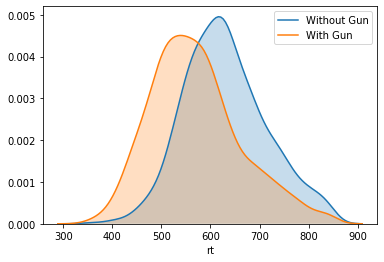

In [16]:
sns.kdeplot(df[df['gun']==0]['rt'], shade=True, label='Without Gun')
sns.kdeplot(df[df['gun']==1]['rt'], shade=True, label='With Gun')
plt.xlabel('rt')

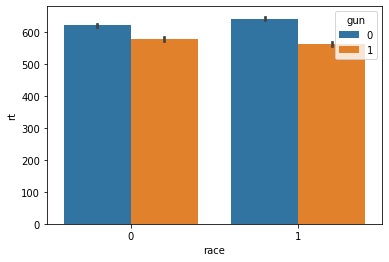

In [17]:
sns.barplot(x='race', y='rt', hue='gun', data=df)

(530, 660)

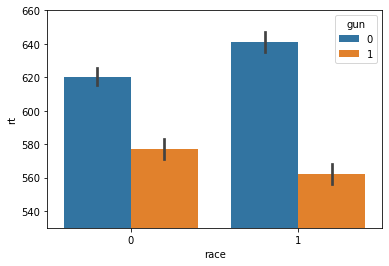

In [18]:
sns.barplot(x='race', y='rt', hue='gun', data=df)
plt.ylim(530, 660)

(0.94, 1)

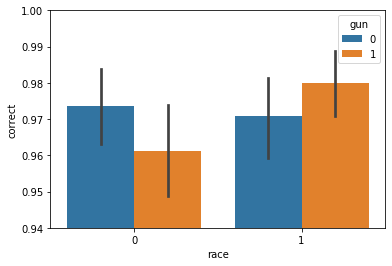

In [19]:
sns.barplot(x='race', y='correct', hue='gun', data=df)
plt.ylim(.94, 1)

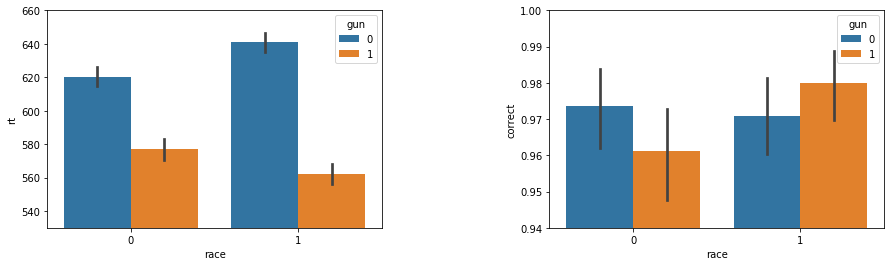

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x='race', y='rt', hue='gun', data=df, ax=ax1)
ax1.set_ylim(530, 660)

sns.barplot(x='race', y='correct', hue='gun', data=df, ax=ax2)
ax2.set_ylim(.94, 1)

plt.subplots_adjust(wspace=.5)
fig.set_figwidth(15)

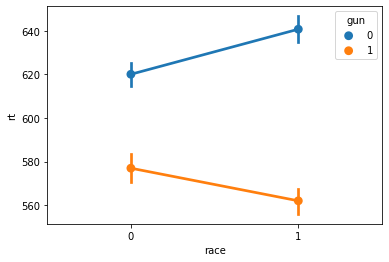

In [21]:
ax = sns.pointplot(x='race', y='rt', hue='gun', data=df)

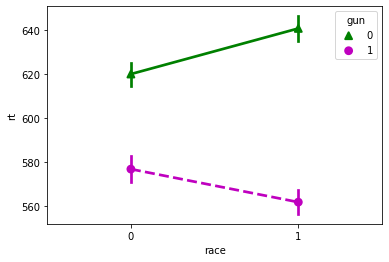

In [22]:
ax = sns.pointplot(x='race', y='rt', hue='gun', data=df, palette={0: 'g', 1: 'm'}, markers=['^', 'o'], linestyles=['-', '--'])

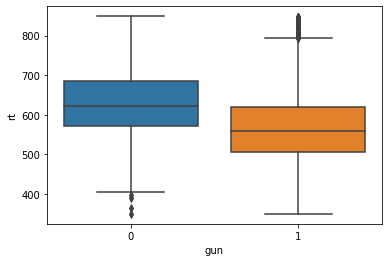

In [23]:
sns.boxplot(x='gun', y='rt', data=df)

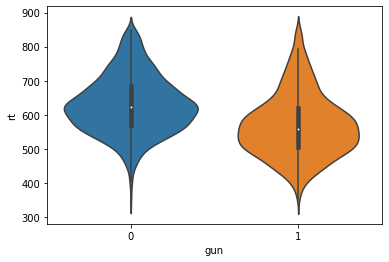

In [24]:
sns.violinplot(x='gun', y='rt', data=df)

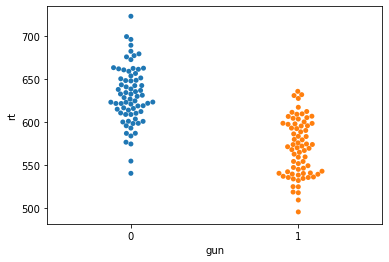

In [25]:
subject_data = df.groupby(['subject', 'gun', 'race'], as_index=False).mean()
sns.swarmplot(x='gun', y='rt', data=subject_data)

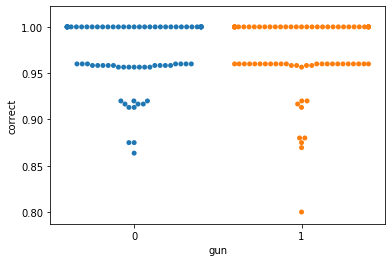

In [26]:
subject_data = df.groupby(['subject', 'gun', 'race', 'age'], as_index=False).mean()
sns.swarmplot(x='gun', y='correct', data=subject_data)

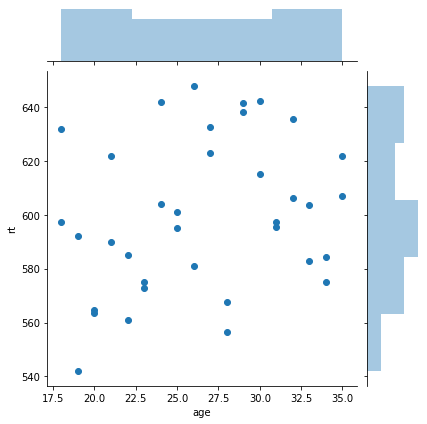

In [27]:
sns.jointplot(x='age', y='rt', data=df.groupby(['subject']).mean())

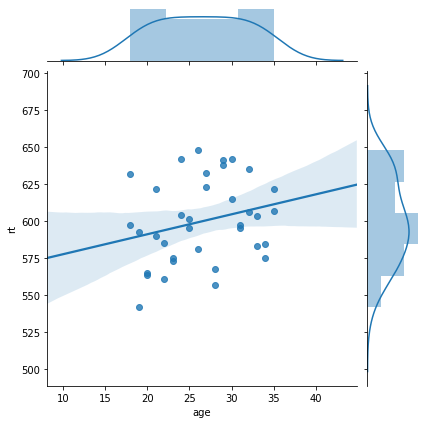

In [28]:
sns.jointplot(x='age', y='rt', data=df.groupby(['subject']).mean(), kind='reg')

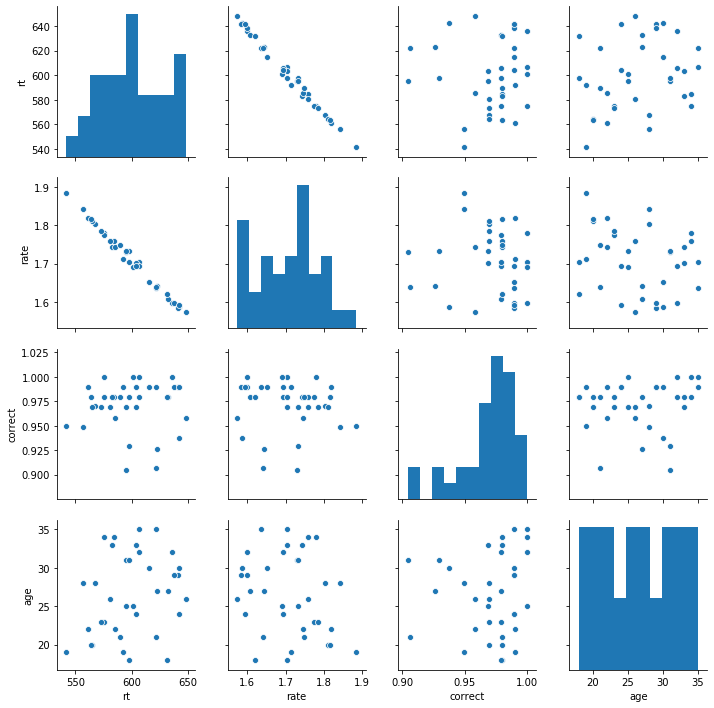

In [29]:
sns.pairplot(df[['subject', 'rt', 'rate', 'correct', 'age']].groupby(['subject']).mean())

## Regression plots

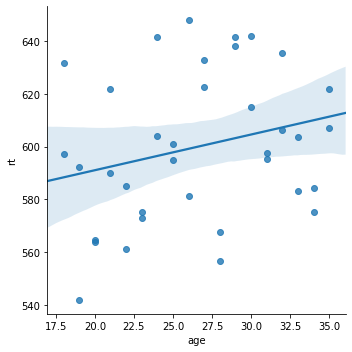

In [30]:
sns.lmplot(x='age', y='rt', data=df.groupby(['subject']).mean())

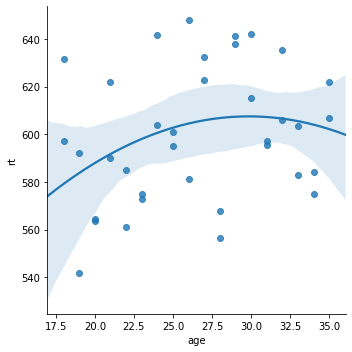

In [31]:
sns.lmplot(x='age', y='rt', order=2, data=df.groupby(['subject']).mean())

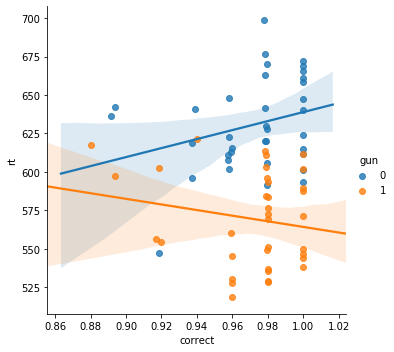

In [32]:
sns.lmplot(x='correct', y='rt', hue='gun', data=df.groupby(['subject', 'gun'], as_index=False).mean())

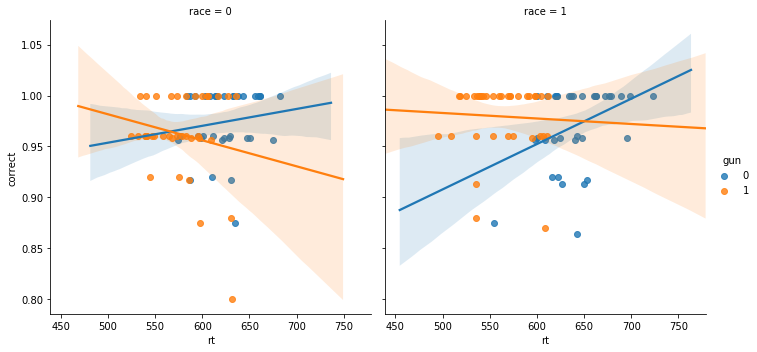

In [33]:
sns.lmplot(x='rt', y='correct', col='race', hue='gun', data=df.groupby(['subject', 'race', 'gun'], as_index=False).mean())